<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2015/16</h2>
<h2>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h2>
<h3>Week 6 - Temporal networks</h3>
<hr>
</center>

Download the network of sexual contacts from http://www.ploscompbiol.org/article/info%3Adoi%2F10.1371%2Fjournal.pcbi.1001109

In [1]:
import networkx as nx
from collections import defaultdict

In [2]:
edgelist=defaultdict(list)#dictionary: day->active links

In [3]:
finput=open('./Dataset_sexual_network.csv','r')
for line in finput.readlines():
    
    if line[0]!='#':#not a comment
        s=line.strip().split(';')
        
        day=int(s[2])
        edge=(int(s[0]), int(s[1]))
                
        edgelist[day].append(edge)
        
finput.close()

In [4]:
G_agg=nx.Graph()#aggregated graph
G_agg.disease_status={}

In [5]:
daystart=800#we skip the transient
dayend=1800

In [6]:
for d in edgelist:
    if d>=daystart and d<=dayend:
        links=edgelist[d]
        G_agg.add_edges_from(links)#aggiungo i link al grafo

print "The aggregated network has", len(G_agg.nodes()),"nodes"
print "The aggregated network has", len(G_agg.edges()),"links"

The aggregated network has 11306 nodes
The aggregated network has 23345 links


In [7]:
nx.is_connected(G_agg)

False

In [8]:
nx.number_connected_components(G_agg)

337

In [10]:
for i in nx.connected_components(G_agg):
    print len(i)

10566
2
2
2
2
2
2
2
2
2
4
2
2
2
2
2
3
2
2
4
2
2
3
3
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
4
2
2
6
2
2
4
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
2
2
3
2
2
2
2
2
3
2
2
2
8
2
5
2
3
2
2
2
2
4
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
5
3
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
4
2
2
2
2
2
4
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


#### We consider a simple SI model on the aggregated graph

In [13]:
#let's choose a random seed
import random

seed_links=edgelist[daystart]
print len(seed_links)

random.shuffle(seed_links)
seed=seed_links[0][0]

print "The degree of the seed is", G_agg.degree(seed)

12
The degree of the seed is 154


In [14]:
infected_nodes=[]
infected_nodes.append(seed)

for n in G_agg.nodes():
    if n in infected_nodes:
        G_agg.disease_status[n]=1
        #infected
    else:
        G_agg.disease_status[n]=0
        #susceptible

In [15]:
Itime_agg=[]

#there are 1000 days of network activity but the network does not change!

for t in xrange(0,1000):
    
    for i in infected_nodes:
        for j in G_agg.neighbors(i):
            if G_agg.disease_status[j]==0:
                G_agg.disease_status[j]=1#the probability of infection is 1!!
                
    #ciclo per aggiornare l'elenco dei nodi infetti
    infected_nodes=[]
    for n in G_agg.nodes():
        if G_agg.disease_status[n]==1:
            infected_nodes.append(n)
 
    Itime_agg.append(len(infected_nodes))

print "The final size of the epidemic is", float(len(infected_nodes))/len(G_agg.nodes())

The final size of the epidemic is 0.934548027596


In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


[0, 10, -1, 10600]

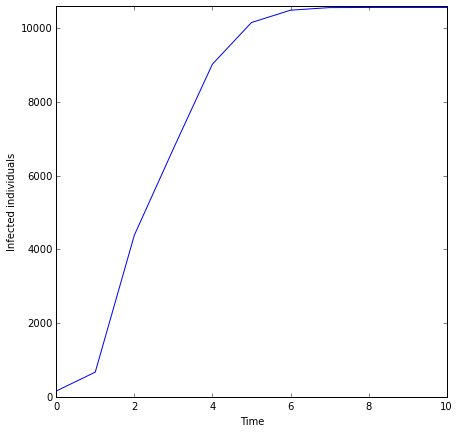

In [17]:
plt.figure(figsize=(7,7))
plt.xlabel('Time')
plt.ylabel('Infected individuals')
plt.plot(xrange(0,len(Itime_agg)),Itime_agg)
plt.axis([0,10,-1,10600])

#### Let's consider the temporal network

In [18]:
G_dyn=nx.Graph()
G_dyn.disease_status={}

In [19]:
seed_links=edgelist[daystart]
random.shuffle(seed_links)
seed=seed_links[0][0]

In [20]:
infected_nodes=[]
infected_nodes.append(seed)

G_dyn.add_edges_from(seed_links)#we consider only the links that are active on day 0

for n in G_dyn.nodes():
    if n in infected_nodes:
        G_dyn.disease_status[n]=1
        #infected
    else:
        G_dyn.disease_status[n]=0
        #susceptible

In [21]:
Itime_dyn=[]
for t in xrange(daystart,dayend+1):

    links=edgelist[t]#these are the links active on day t
    
    if t==daystart:
        print "The temporal network has", len(G_dyn.nodes()),"nodes on day", daystart
        print "The temporal network has", len(G_dyn.edges()),"edges on day", daystart
        print "The degree of the seed is", G_dyn.degree(seed)
    else:
        G_dyn.add_edges_from(links)
        for e in links:
            if e[0] not in G_dyn.disease_status:
                G_dyn.disease_status[e[0]]=0
            if e[1] not in G_dyn.disease_status:
                G_dyn.disease_status[e[1]]=0

    
    #ciclo sui nodi infetti per la trasmissione
    for i in infected_nodes:
        for j in G_dyn.neighbors(i):
            if G_dyn.disease_status[j]==0:
                G_dyn.disease_status[j]=1
                
    #ciclo per aggiornare l'elenco dei nodi infetti
    infected_nodes=[]
    for n in G_dyn.nodes():
        if G_dyn.disease_status[n]==1:
            infected_nodes.append(n)
    
    Itime_dyn.append(len(infected_nodes))

    #stampo il numero di nodi infetti a ogni time-step
    G_dyn.remove_edges_from(links)

print "The final size of the epidemic is", float(len(infected_nodes))/len(G_dyn.nodes())


The temporal network has 22 nodes on day 800
The temporal network has 12 edges on day 800
The degree of the seed is 1
The final size of the epidemic is 0.711303732531


[0, 1000, -1, 10600]

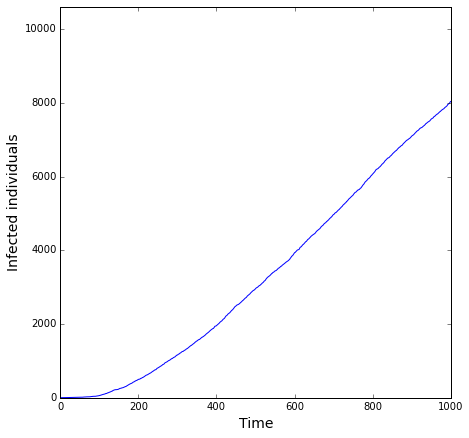

In [23]:
plt.figure(figsize=(7,7))
plt.xlabel('Time', fontsize=14)
plt.ylabel('Infected individuals', fontsize=14)
plt.plot(xrange(0,len(Itime_dyn)),Itime_dyn)
plt.axis([0,1000,-1,10600])